This notebook focuses on reading CSV files and creating tuples without creating a new CSV, as well as practicing reading items from the file where cells may have missing or extra data.

In [1]:
#import necessary modules

import csv

import numpy as np
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#python command to display first lines of csv file
!head data100.csv

3000,22,1969-11-01,W.K. Clifford,,,,,84
3001,22,1969-11-01,A. Martin,,,,,13
3002,22,1969-11-01,Matthew Collins,"Asher B. Evans
 A. Cayley","23
 23","Jun 70
 Jul 70","13
 14",41
3003,22,1969-11-01,J.J. Sylvester,R. Townsend,22,1969-12-01,12,17
3004,22,1969-11-01,R.W. Genese,R.W. Genese,23,1970-12-01,14,14
3005,22,1969-11-01,S. Watson,"S. Watson


In [17]:
#first create tuples using all columns
allData = []
with open('data100.csv', 'r') as f:
    filereader = csv.reader(f, delimiter=",", quotechar='"')
    next(filereader) # skips header row
    for row in filereader:
            allData.append(row)

In [18]:
#print a tuple to see what we have created
allData

[['3001', '22', '1969-11-01', 'A. Martin', '', '', '', '', '13'],
 ['3002',
  '22',
  '1969-11-01',
  'Matthew Collins',
  'Asher B. Evans\n A. Cayley',
  '23\n 23',
  'Jun 70\n Jul 70',
  '13\n 14',
  '41'],
 ['3003',
  '22',
  '1969-11-01',
  'J.J. Sylvester',
  'R. Townsend',
  '22',
  '1969-12-01',
  '12',
  '17'],
 ['3004',
  '22',
  '1969-11-01',
  'R.W. Genese',
  'R.W. Genese',
  '23',
  '1970-12-01',
  '14',
  '14'],
 ['3005',
  '22',
  '1969-11-01',
  'S. Watson',
  'S. Watson\n Artemas Martin',
  '23\n xx',
  'Nov 70\n xx',
  '14\n 14',
  '14'],
 ['3006',
  '22',
  '1969-11-01',
  'J.J. Walker',
  'R.W. Genese\n R. Tucker',
  'xx\n xx',
  'xx\n xx',
  '13\n 13',
  '48'],
 ['3007',
  '22',
  '1969-11-01',
  'R. Tucker',
  'R. Tucker',
  'xx',
  'xx',
  '14',
  '86'],
 ['3008', '22', '1969-11-01', 'W.S. Burnside', '', '', '', '', '79'],
 ['3009',
  '22',
  '1969-11-01',
  'F.E. Kitchener',
  'T.T. Wilkinson\n A.A. Bourne\n T.J. Sanderson\n R.W. Genese\n R. Tucker\n A. Martin\n

In [19]:
#create a list of lists using the proposer and solver columns only
allEdges = []
edge = []
i=0
for x in allData:
    edge.append([x[3],x[4]])
    allEdges.append(edge[i])
    i=i+1

In [20]:
#list is almost in the correct format
#still need to seperate fields with more than one solver per question
allEdges

[['A. Martin', ''],
 ['Matthew Collins', 'Asher B. Evans\n A. Cayley'],
 ['J.J. Sylvester', 'R. Townsend'],
 ['R.W. Genese', 'R.W. Genese'],
 ['S. Watson', 'S. Watson\n Artemas Martin'],
 ['J.J. Walker', 'R.W. Genese\n R. Tucker'],
 ['R. Tucker', 'R. Tucker'],
 ['W.S. Burnside', ''],
 ['F.E. Kitchener',
  'T.T. Wilkinson\n A.A. Bourne\n T.J. Sanderson\n R.W. Genese\n R. Tucker\n A. Martin\n F.E. Kitchin'],
 ['J.J. Walker', 'J.J. Walker'],
 ['R. Tucker', 'R. Tucker'],
 ['A.B. Evans', ''],
 ['J.J. Sylvester', ''],
 ['J.J. Sylvester', ''],
 ['A. Martin', 'A. Martin'],
 ['J.J. Sylvester', ''],
 ['A.W. Panton', 'G.M. Minchin'],
 ['J. Wolstenholme', 'R. Townsend\n J. Wolstenholme'],
 ['J.J. Sylvester', ''],
 ['J. Blissard', 'J.J. Walker'],
 ['W.K. Clifford', 'R. Townsend'],
 ['W. Roberts', 'R. Townsend'],
 ['W.A. Whitworth', ''],
 ['A.B. Evans', 'R. Tucker'],
 ['J.J. Walker', 'A.A. Bourne\n R.W. Genese'],
 ['W.S. Burnside', ''],
 ['T. Cotterill', ''],
 ['A. Martin', ''],
 ['S. Watson', 'Prof

In [21]:
# Create empty graph using networkx
GA = nx.Graph()

In [22]:
#create graph using networkx
GA = nx.from_edgelist(allEdges)

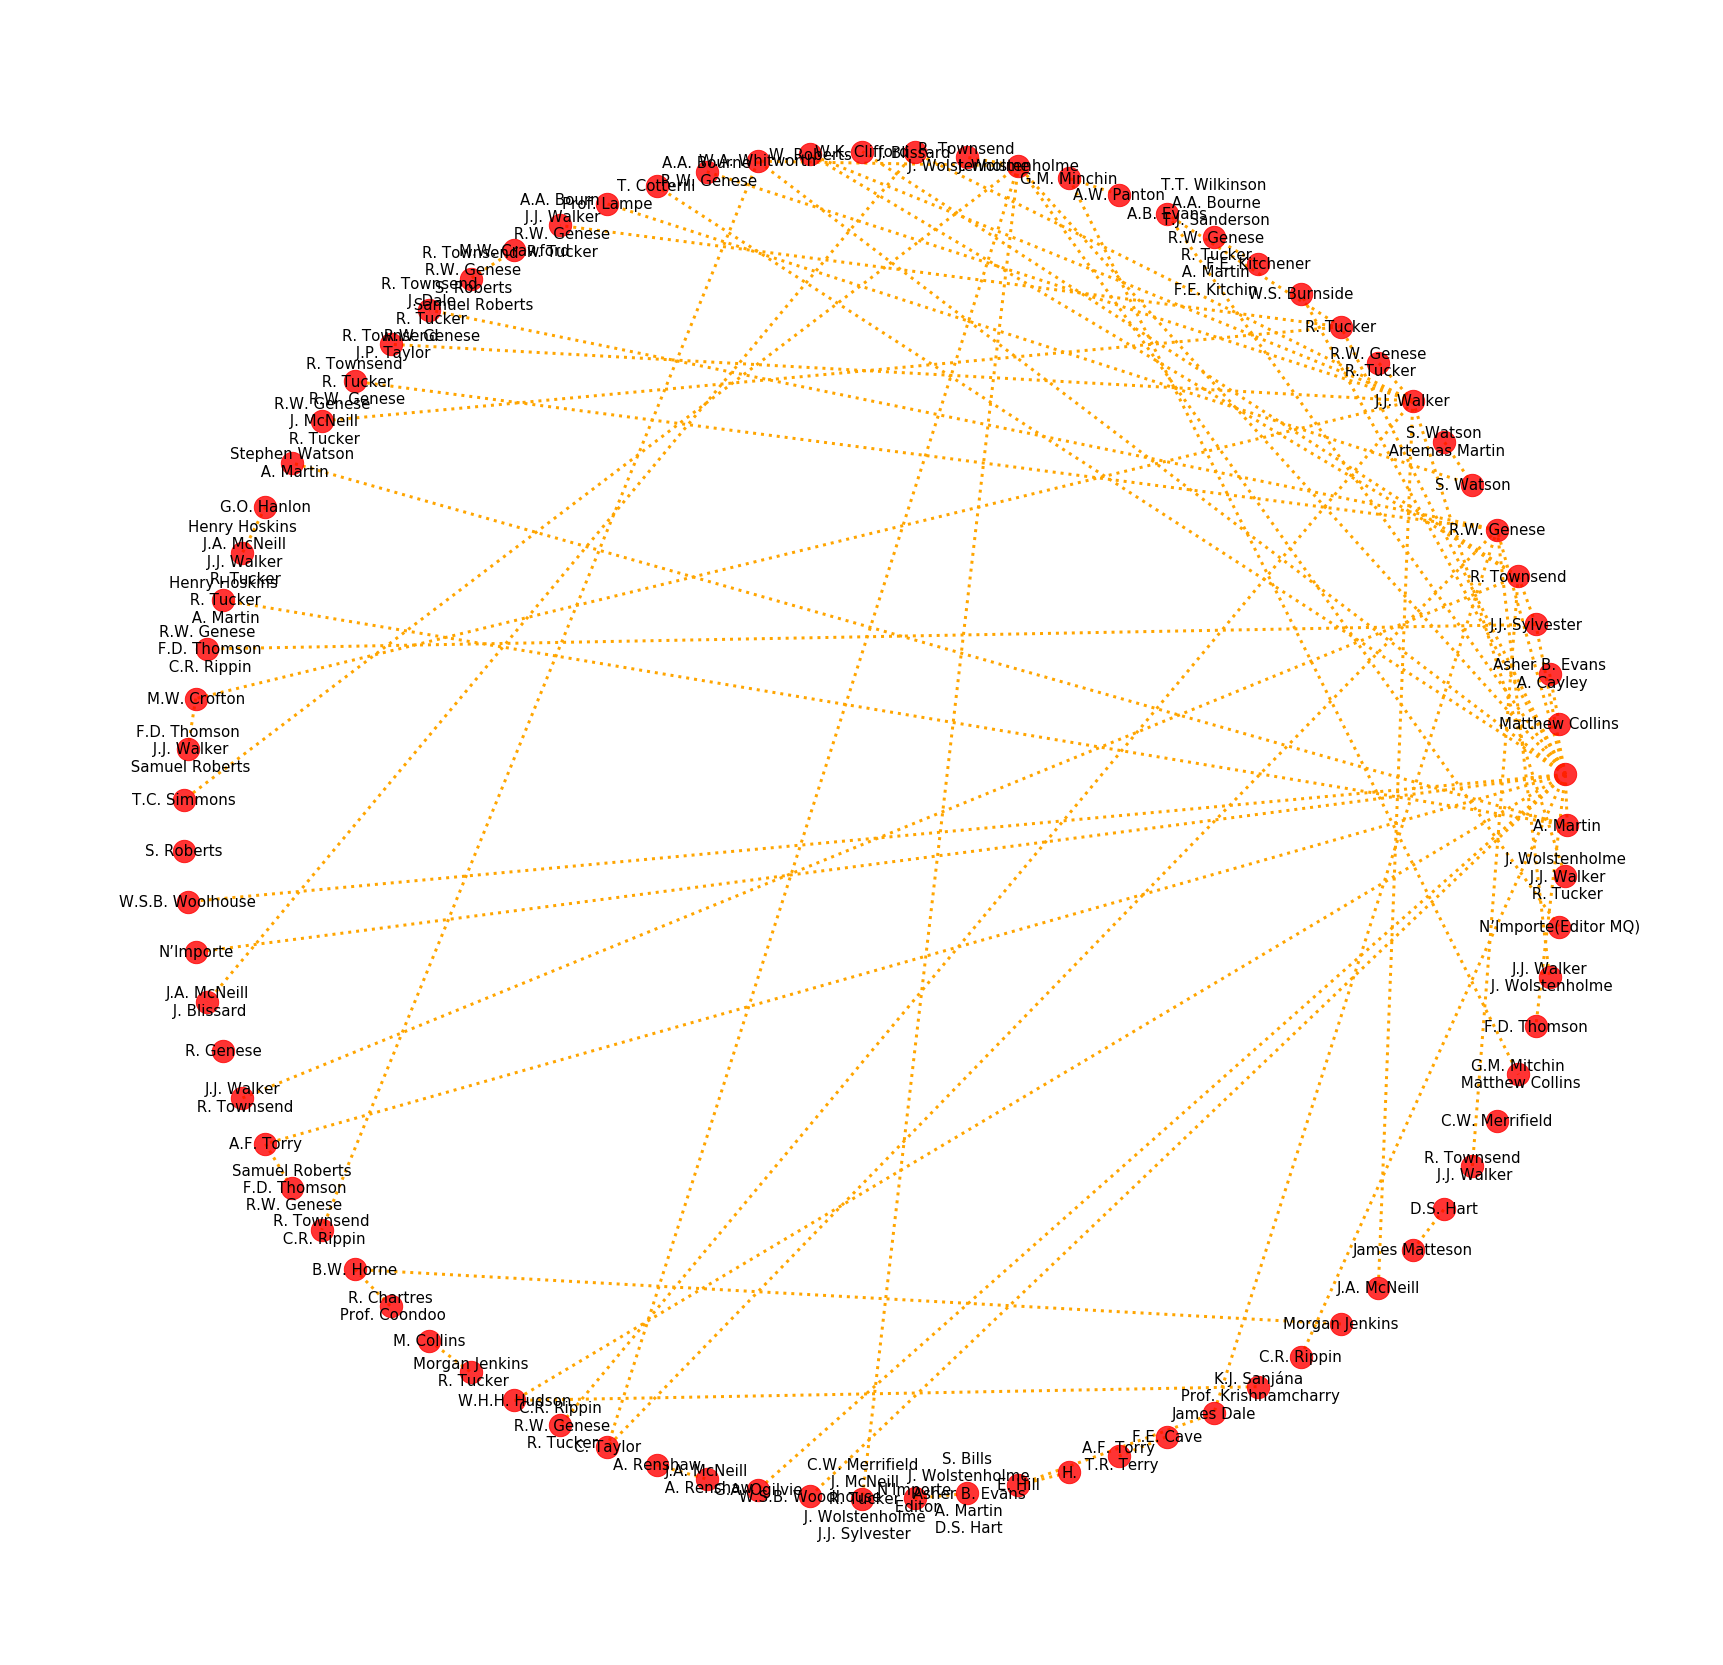

In [23]:
#test to see how the graph will look.
#shows that questions which do not have answers point to a single node on the graph
#NEED TO SHOW DR. DESPEAUX
#this may look better when data is sorted so that it is by person, not date (all fields invovle one person)

#layouts...

#width, length
plt.figure(figsize=(30,30))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(GA)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(GA, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(GA, pos=layout, font_size=15)

#plt.show()
plt.savefig("week3firstTry.png", format="PNG")

In [43]:
#practice with sets that have same name in each row as either a question proposer or solver
#first make a list
walker = []
with open('walker.csv', 'r') as f:
    filereader = csv.reader(f, delimiter=",", quotechar='"')
    next(filereader) # skips header row
    for row in filereader:
            walker.append(row)

In [63]:
#create a list of lists using the proposer and solver columns only
walkerEdges = []
edge = []
i=0
for x in walker:
    edge.append([x[3],x[4]])
    walkerEdges.append(edge[i])
    i=i+1

In [64]:
walkerEdges

[['J.J. Walker', 'J.J. Walker'],
 ['J. Blissard', 'J.J. Walker'],
 ['J.J. Walker', 'A.A. Bourne\n R.W. Genese'],
 ['R. Tucker', 'J.J. Walker'],
 ['J.J. Walker', 'R. Townsend\n J.P. Taylor'],
 ['G.O. Hanlon', 'J.J. Walker'],
 ['M.W. Crofton', 'J.J. Walker'],
 ['R. Townsend', 'J.J. Walker'],
 ['W. Roberts', 'J.J. Walker'],
 ['J.J. Walker', 'C.R. Rippin\n R.W. Genese\n R. Tucker'],
 ['R. Townsend', 'J.J. Walker'],
 ['J.J. Walker', 'J.A. McNeill'],
 ['M.W. Crofton', 'J.J. Walker'],
 ['R. Townsend', 'J.J. Walker'],
 ['R.W. Genese', 'J.J. Walker'],
 ['J.J. Walker', 'J.J. Walker']]

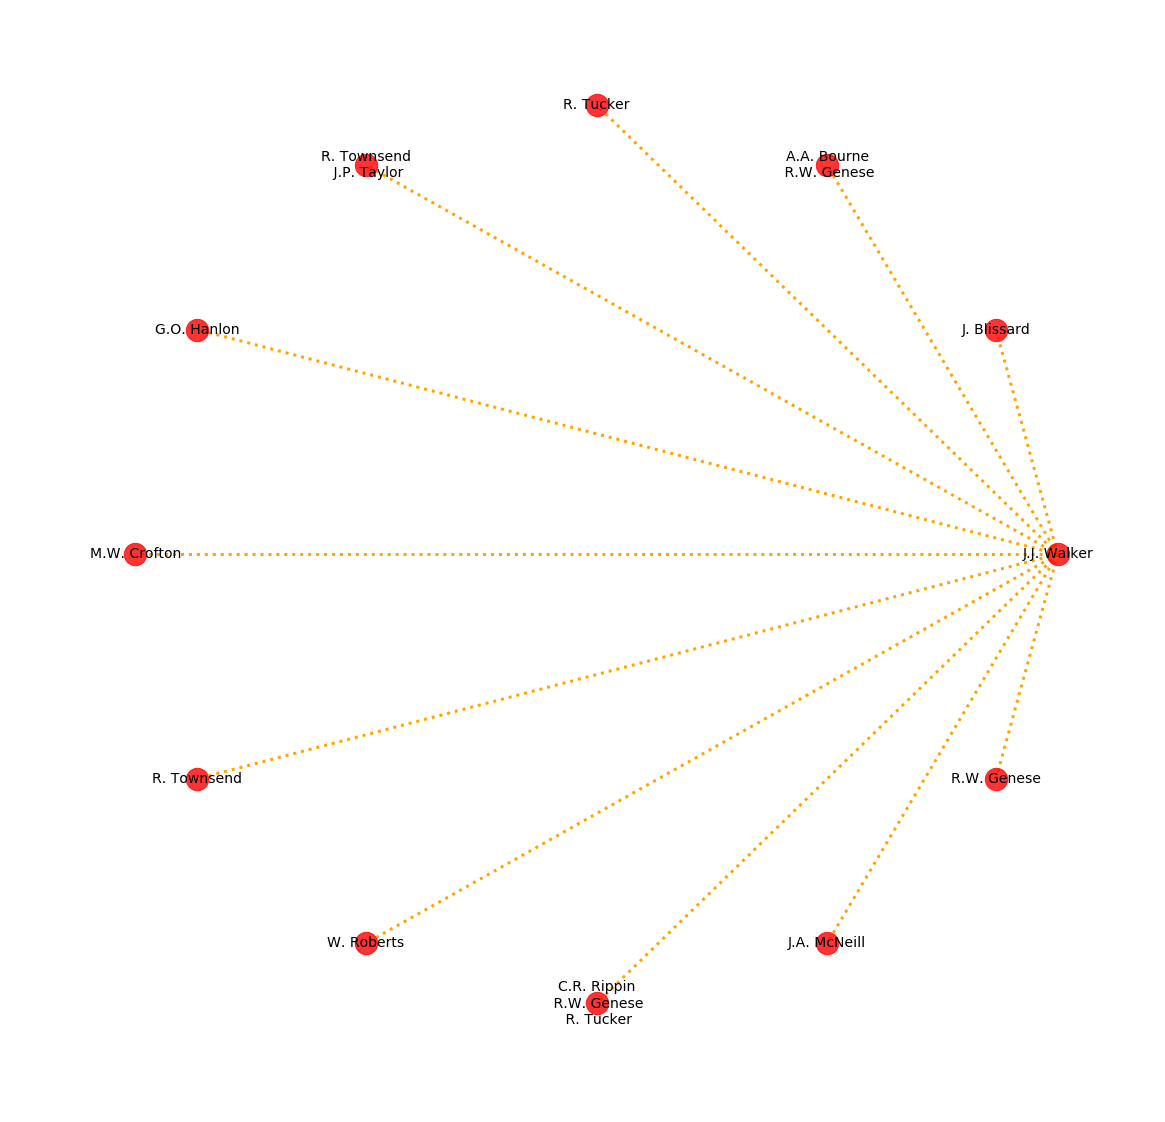

In [66]:
#create graph using networkx
GA = nx.from_edgelist(walkerEdges)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(GA)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(GA, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(GA, pos=layout, font_size=14)

#plt.show()
plt.savefig("week3walker.png", format="PNG")

In [67]:
#take another look at these edges
#still need to seperate them by solvers
walkerEdges

[['J.J. Walker', 'J.J. Walker'],
 ['J. Blissard', 'J.J. Walker'],
 ['J.J. Walker', 'A.A. Bourne\n R.W. Genese'],
 ['R. Tucker', 'J.J. Walker'],
 ['J.J. Walker', 'R. Townsend\n J.P. Taylor'],
 ['G.O. Hanlon', 'J.J. Walker'],
 ['M.W. Crofton', 'J.J. Walker'],
 ['R. Townsend', 'J.J. Walker'],
 ['W. Roberts', 'J.J. Walker'],
 ['J.J. Walker', 'C.R. Rippin\n R.W. Genese\n R. Tucker'],
 ['R. Townsend', 'J.J. Walker'],
 ['J.J. Walker', 'J.A. McNeill'],
 ['M.W. Crofton', 'J.J. Walker'],
 ['R. Townsend', 'J.J. Walker'],
 ['R.W. Genese', 'J.J. Walker'],
 ['J.J. Walker', 'J.J. Walker']]

In [68]:
#this works!
fixedWalker = []
edge = []
i=0
for x in walkerEdges:
    if "\n" in x[1]:
        print(x[1])
        solvers = x[1].split("\n ")
        print(solvers)
        for y in solvers:
            fixedWalker.append([x[0],y])
    else:
        fixedWalker.append(x)
    i=i+1
fixedWalker

A.A. Bourne
 R.W. Genese
['A.A. Bourne', 'R.W. Genese']
R. Townsend
 J.P. Taylor
['R. Townsend', 'J.P. Taylor']
C.R. Rippin
 R.W. Genese
 R. Tucker
['C.R. Rippin', 'R.W. Genese', 'R. Tucker']


[['J.J. Walker', 'J.J. Walker'],
 ['J. Blissard', 'J.J. Walker'],
 ['J.J. Walker', 'A.A. Bourne'],
 ['J.J. Walker', 'R.W. Genese'],
 ['R. Tucker', 'J.J. Walker'],
 ['J.J. Walker', 'R. Townsend'],
 ['J.J. Walker', 'J.P. Taylor'],
 ['G.O. Hanlon', 'J.J. Walker'],
 ['M.W. Crofton', 'J.J. Walker'],
 ['R. Townsend', 'J.J. Walker'],
 ['W. Roberts', 'J.J. Walker'],
 ['J.J. Walker', 'C.R. Rippin'],
 ['J.J. Walker', 'R.W. Genese'],
 ['J.J. Walker', 'R. Tucker'],
 ['R. Townsend', 'J.J. Walker'],
 ['J.J. Walker', 'J.A. McNeill'],
 ['M.W. Crofton', 'J.J. Walker'],
 ['R. Townsend', 'J.J. Walker'],
 ['R.W. Genese', 'J.J. Walker'],
 ['J.J. Walker', 'J.J. Walker']]

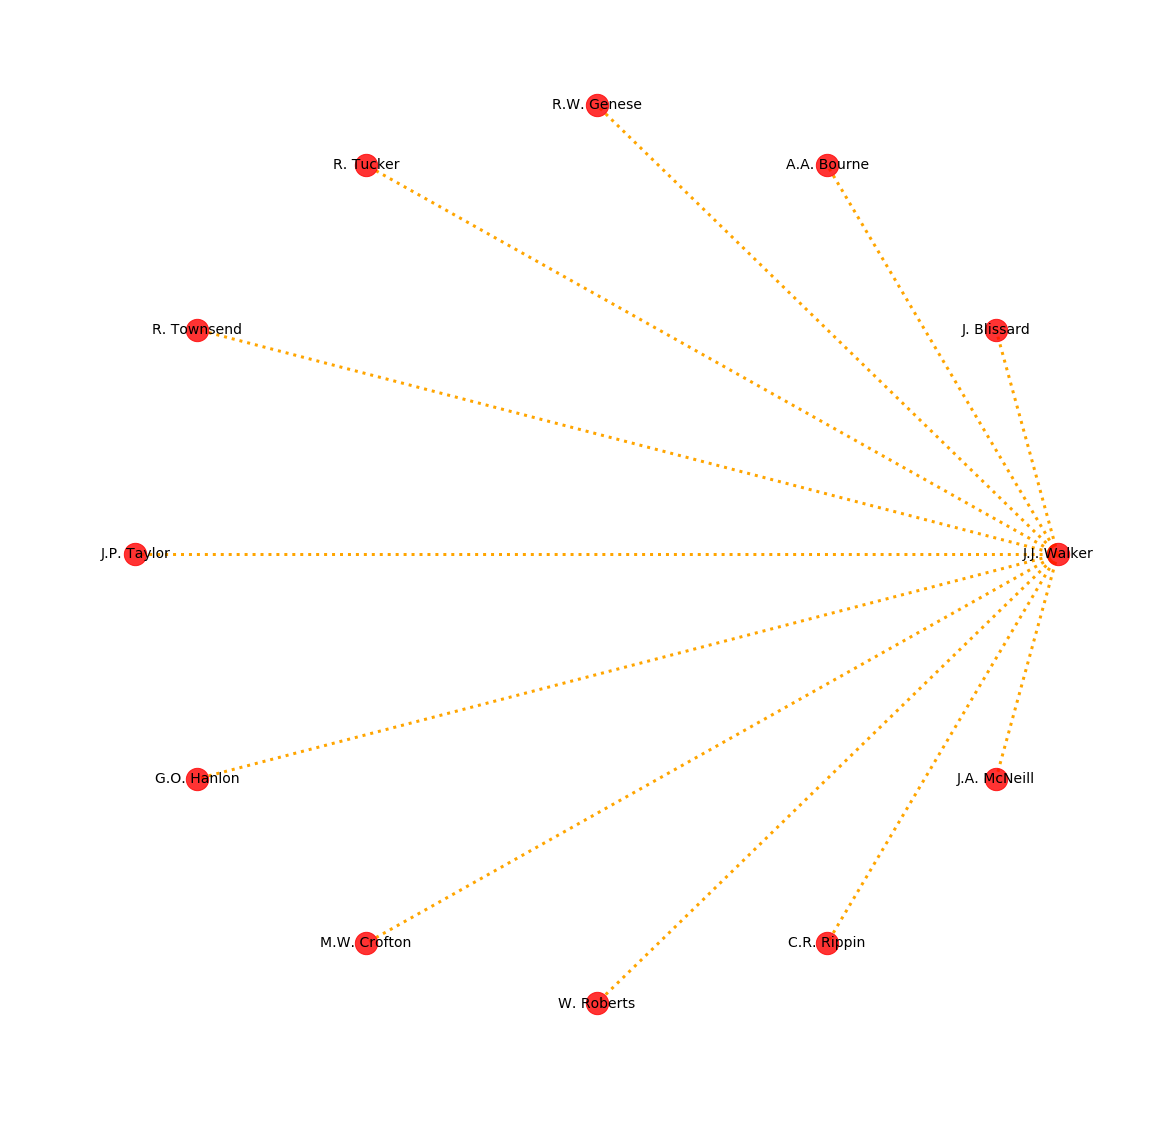

In [69]:
#create graph using networkx
GA = nx.from_edgelist(fixedWalker)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(GA)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(GA, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(GA, pos=layout, font_size=14)

#plt.show()
plt.savefig("week3fixedWalker.png", format="PNG")

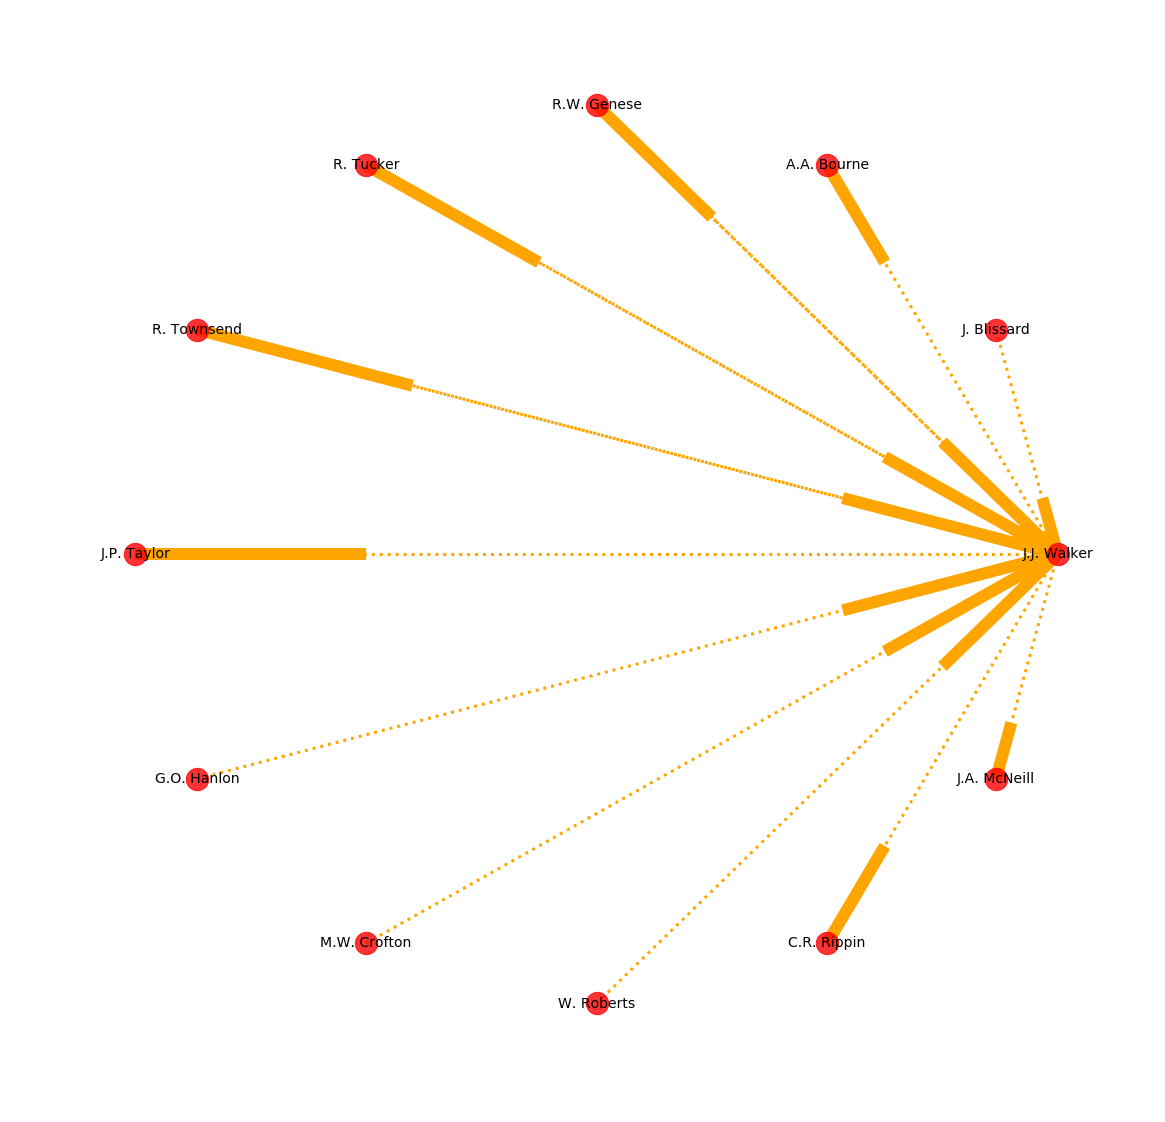

In [78]:
#digraph also works!
#thick lines are on the side of the solver
D = nx.DiGraph()
D.add_edges_from(fixedWalker)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(D)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(D, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(D, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(D, pos=layout, font_size=14)

#plt.show()
plt.savefig("week3walkerDiGraph.png", format="PNG")